In [ ]:
pip install git+https://github.com/zeyuanxuan/LISAeccentric.git

  Cloning https://github.com/zeyuanxuanphy/LISAeccentric.git to /tmp/pip-req-build-nz7yp8xx
  Running command git clone --filter=blob:none --quiet https://github.com/zeyuanxuanphy/LISAeccentric.git /tmp/pip-req-build-nz7yp8xx
  Resolved https://github.com/zeyuanxuanphy/LISAeccentric.git to commit f122643b352facfac2484bb6b7f5e2db017170c3
  Preparing metadata (setup.py) ... done
  Created wheel for LISAeccentric: filename=LISAeccentric-0.1.0-py3-none-any.whl size=56089057 sha256=df978bdb21ea474c3198d610c3e65bed8be42b24ac3bd01ee1e064d8a62a989b
  Stored in directory: /tmp/pip-ephem-wheel-cache-kcg975h3/wheels/42/27/ab/d18da70402855b01d2e51e55444e2a0c676267ac18a76b2c9d
Successfully built LISAeccentric


In [ ]:
"""
LISAeccentric Official Tutorial
==============================================================================
This script demonstrates the full workflow of the 'LISAeccentric' package.

It covers:
1. Galactic Nucleus (GN): SMBH-perturbed mergers, Steady State & Starbursts.
2. Globular Clusters (GC): Dynamical mergers (In-cluster vs Ejected).
3. Galactic Field: Fly-by induced mergers in MW and Elliptical galaxies.
4. Waveform Analysis: Waveform generation, LISA response, SNR, and Strain (h_c).

Usage:
    Ensure the 'LISAeccentric' folder is in the same directory.
    Run: python Tutorial_LISAeccentric.py
==============================================================================
"""

import numpy as np
import matplotlib.pyplot as plt

# Import the package directly
import LISAeccentric


>>> MODULE 1: GALACTIC NUCLEUS (GN)

[1.1] Sampling Eccentricities (LIGO Band @ 10Hz)

[GN] Sampling 5000 merger eccentricities (max_mass=50.0)...
Sample Mean e (at 10Hz): 3.8520e-05


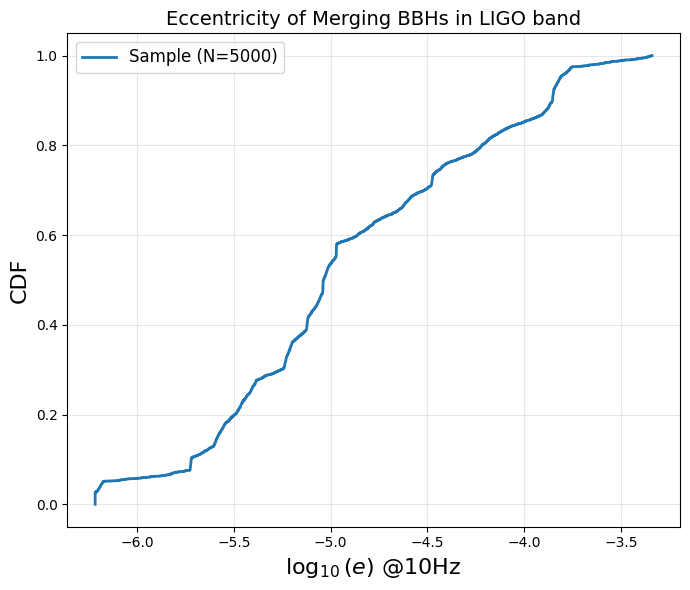


[1.2] Inspecting Progenitor Initial States

[GN] Getting 3 Progenitor Systems...
<CompactBinary [GN_Progenitor]: M=23.6+9.9, a=0.12AU, e=0.8929, Dl=8.0kpc>
<CompactBinary [GN_Progenitor]: M=48.8+12.1, a=0.11AU, e=0.5531, Dl=8.0kpc>
<CompactBinary [GN_Progenitor]: M=8.7+27.5, a=0.25AU, e=0.9967, Dl=8.0kpc>

[1.3] Generating Snapshot (LISA Band)

[GN] Generating Snapshot: Rate=2.0/Myr, YNC Age=6.0 Myr
Altogether 1707 systems survived.


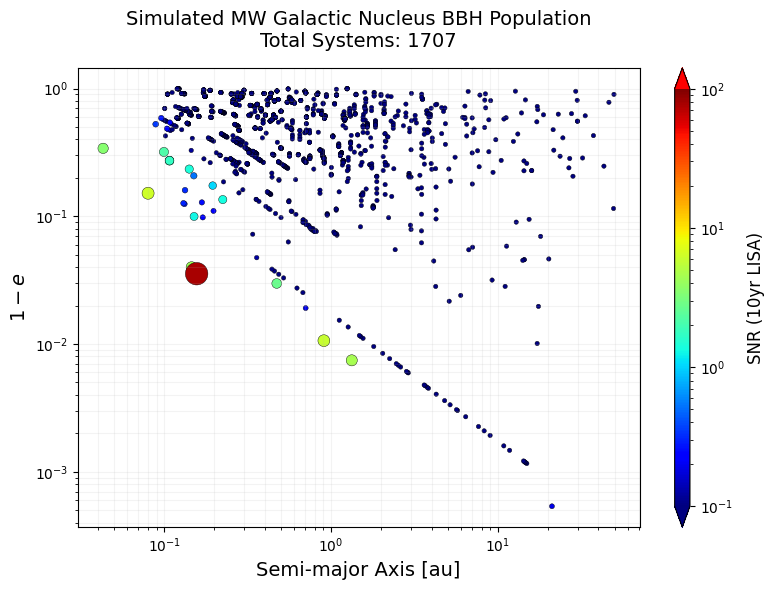


[1.4] Calculating GW Peak Frequency (f_peak)
[GN Util] f_peak = 1.2120e-03 Hz (a=0.16 AU, e=0.9645)


In [ ]:
# ==============================================================================
# MODULE 1: GALACTIC NUCLEUS (GN)
# ==============================================================================
print("\n" + "="*70)
print(">>> MODULE 1: GALACTIC NUCLEUS (GN)")
print("="*70)

# --- 1.1 Sample Merger Eccentricities (LIGO Band) ---
# Goal: Analyze the eccentricity distribution when binaries enter the LIGO band (10Hz).
# Physics: High eccentricities are induced by the Kozai-Lidov mechanism from the SMBH.
print("\n[1.1] Sampling Eccentricities (LIGO Band @ 10Hz)")
gn_e_samples = LISAeccentric.GN.sample_eccentricities(
    n_samples=5000,      # Total number of systems to sample
    max_bh_mass=50.0,    # Cutoff: exclude BHs heavier than 50 Msun
    plot=True            # Action: Plot the Cumulative Distribution Function (CDF)
)

# --- 1.2 Inspect Progenitor Population ---
# Goal: Access the library of initial conditions for systems that eventually merge.
# Returns: List of CompactBinary objects representing the progenitors.
print("\n[1.2] Inspecting Progenitor Initial States")
gn_progenitors = LISAeccentric.GN.get_progenitor(n_inspect=3)

# --- 1.3 Generate Snapshot (LISA Band / Current Epoch) ---
# Goal: Simulate the current population of BBHs orbiting Sgr A*.
# Components:
#   1. Steady State: Continuous formation over galactic history.
#   2. Young Nuclear Cluster (YNC): A recent starburst event (e.g., 6 Myr ago).
print("\n[1.3] Generating Snapshot (LISA Band)")
gn_snapshot = LISAeccentric.GN.get_snapshot(
    rate_gn=2.0,         # Steady state formation rate [systems/Myr]
    age_ync=6.0e6,       # Age of the Young Nuclear Cluster [years]
    n_ync_sys=100,       # Number of massive BBHs formed in the YNC
    max_bh_mass=50.0,    # Mass filter
    plot=True            # Action: Plot a vs (1-e) phase space
)

# --- 1.4 Extra: Calculate Peak Frequency ---
# Goal: Calculate the GW peak frequency for a highly eccentric binary.
# Note: For e -> 1, the peak power is emitted at harmonics much higher than f_orb.
print("\n[1.4] Calculating GW Peak Frequency (f_peak)")
if len(gn_snapshot) > 0:
    # Use the first system from the snapshot
    sys = gn_snapshot[0]
    LISAeccentric.GN.calculate_fpeak_frequency(system=sys)
else:
    # Manual calculation if snapshot is empty
    LISAeccentric.GN.calculate_fpeak_frequency(m1=30, m2=30, a_au=0.1, e=0.99)


>>> MODULE 2: GLOBULAR CLUSTERS (GC)

[2.1] Sampling Eccentricities (In-cluster vs Ejected)

[GC] Sampling 5000 eccentricities (Channel: Incluster)...


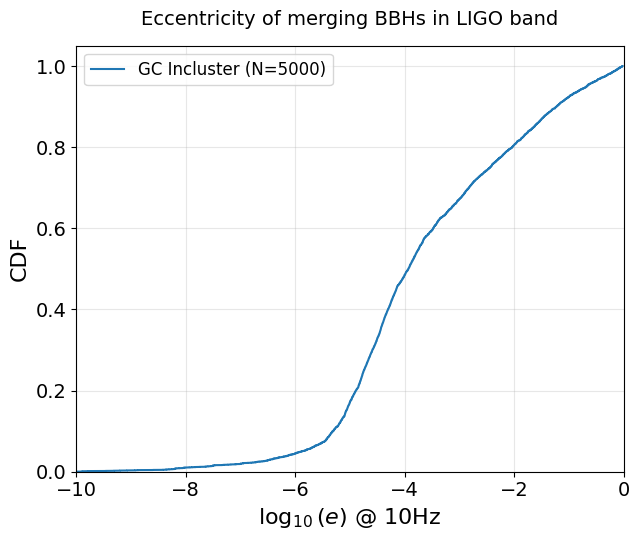


[2.2] Snapshot: Full 10 MW Realizations

[GC] Getting Snapshot (Mode: 10_realizations)...
Total systems retrieved: 2325


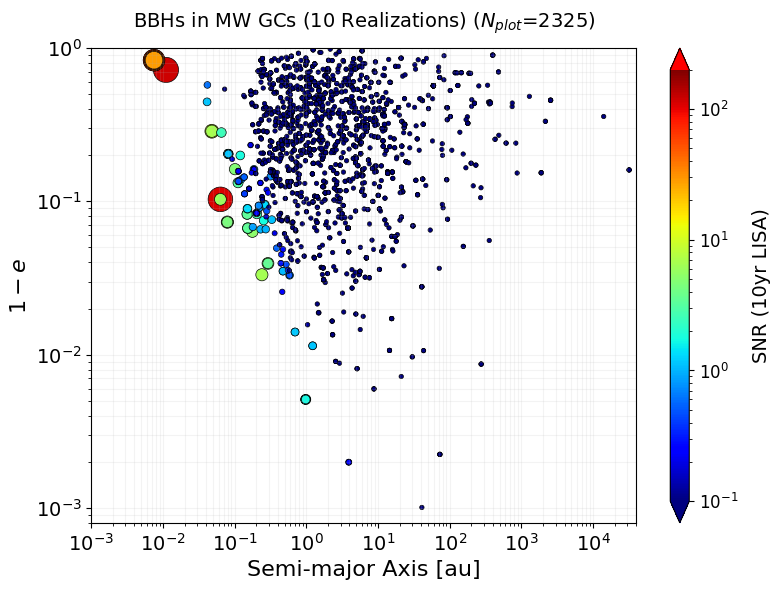


[2.3] Snapshot: Single MW Realization

[GC] Getting Snapshot (Mode: single)...
Total systems retrieved: 232


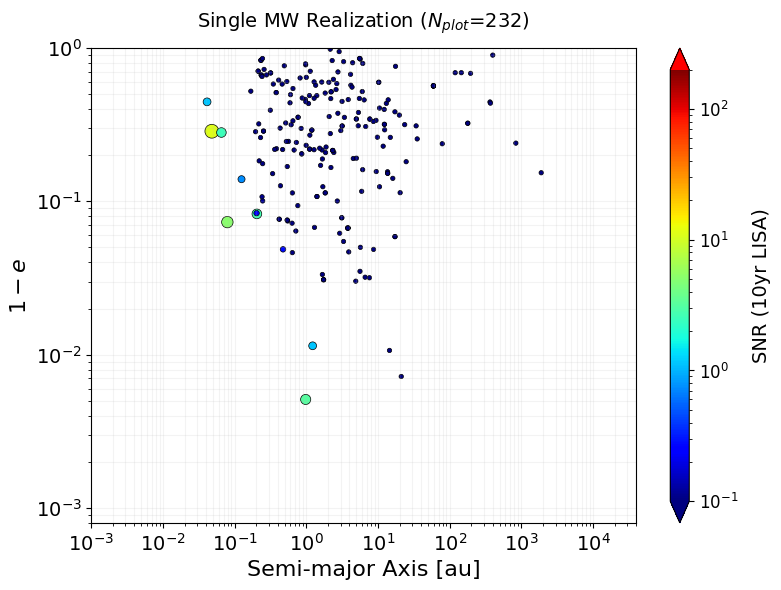


[2.4] Snapshot: Random 500 Systems

[GC] Getting Snapshot (Mode: random)...
Total systems retrieved: 500


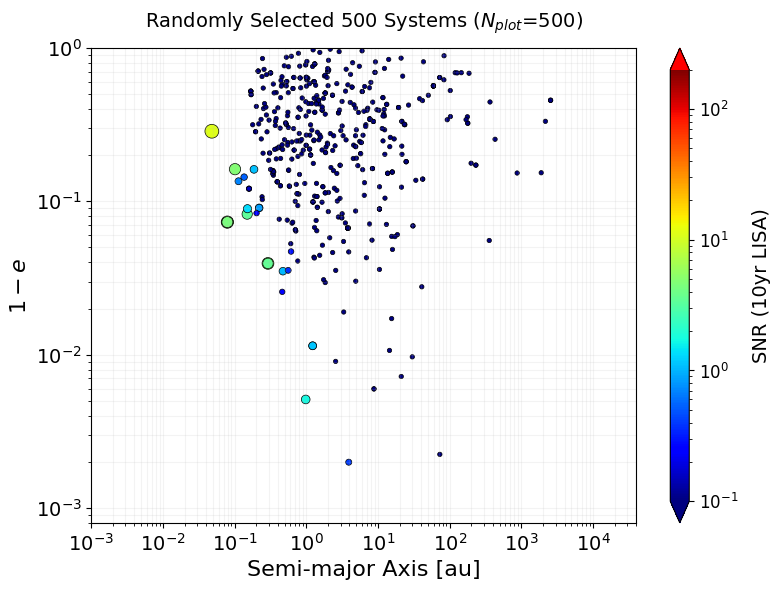

In [ ]:
# ==============================================================================
# MODULE 2: GLOBULAR CLUSTERS (GC)
# ==============================================================================
print("\n" + "="*70)
print(">>> MODULE 2: GLOBULAR CLUSTERS (GC)")
print("="*70)

# --- 2.1 Sample Eccentricities (LIGO Band) ---
# Goal: Compare eccentricity distributions from different dynamical channels.
# Channels: 'Incluster' (merges inside cluster) vs 'Ejected' (merges after ejection).
print("\n[2.1] Sampling Eccentricities (In-cluster vs Ejected)")
gc_e_samples = LISAeccentric.GC.sample_eccentricities(
    n=5000,
    channel_name='Incluster', # Options: 'Incluster', 'Ejected'
    plot=True
)

# --- 2.2 Get Snapshots (Monte Carlo Simulations) ---
# Goal: Visualize BBH populations currently residing in Milky Way Globular Clusters.

# Mode A: Full 10 Realizations (Best statistics)
print("\n[2.2] Snapshot: Full 10 MW Realizations")
gc_data_full = LISAeccentric.GC.get_snapshot(
    mode='10_realizations',
    plot=True
)

# Mode B: Single Milky Way Realization (Realistic scatter)
print("\n[2.3] Snapshot: Single MW Realization")
gc_data_single = LISAeccentric.GC.get_snapshot(
    mode='single',
    plot=True
)

# Mode C: Random Sub-sample (Fixed size for cleaner plotting)
print("\n[2.4] Snapshot: Random 500 Systems")
gc_data_random = LISAeccentric.GC.get_snapshot(
    mode='random',
    n_random=500,
    plot=True
)


>>> MODULE 3: GALACTIC FIELD (FLY-BY)

[3.1] Running Simulation (Milky Way Model)

[Field] Running Simulation for MW...
Initializing fresh simulation...
Running MC simulation ...
Resampling population based on different fly-by induced BBH merger rates at different initial SMA...
Simulation Done. Merger Rate in the galaxy: 0.22652 /Myr. Merger Sample Size: 50000
Data saved to /usr/local/lib/python3.12/dist-packages/LISAeccentric/Field_modeling/data (Rate=0.2265, M=10.0+10.0 Msun)
Simulation Data Saved.

[3.2] Inspecting Field Progenitors

[Field] Getting Progenitor Population (MW)...
Total progenitors in library: 50000 (Masses: 10.0+10.0)


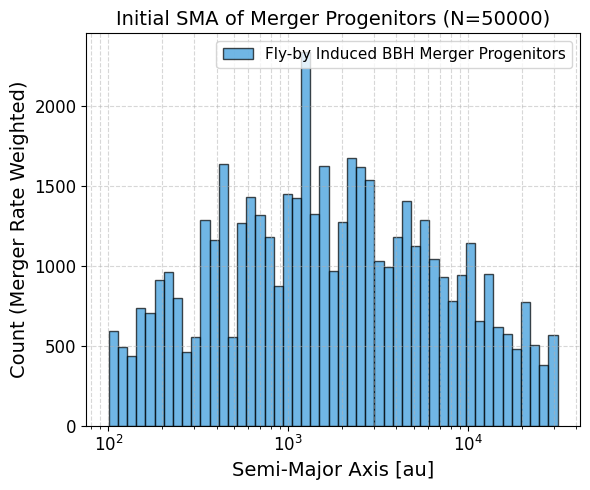

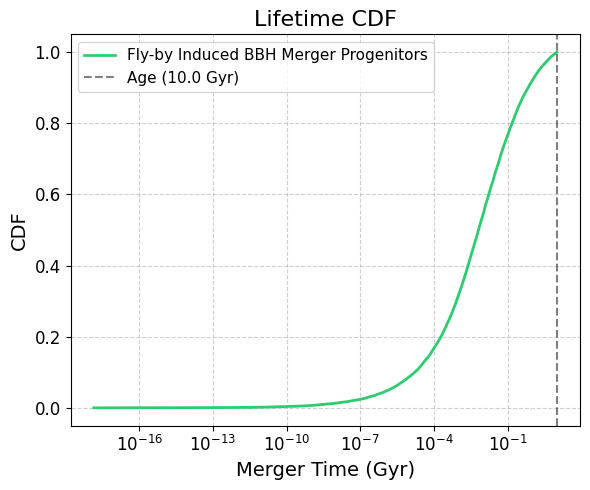


[3.3] Sampling Eccentricities (MW Field)

[Field] Sampling 5000 eccentricities (MW)...
Sample Mean e: 6.4347e-03


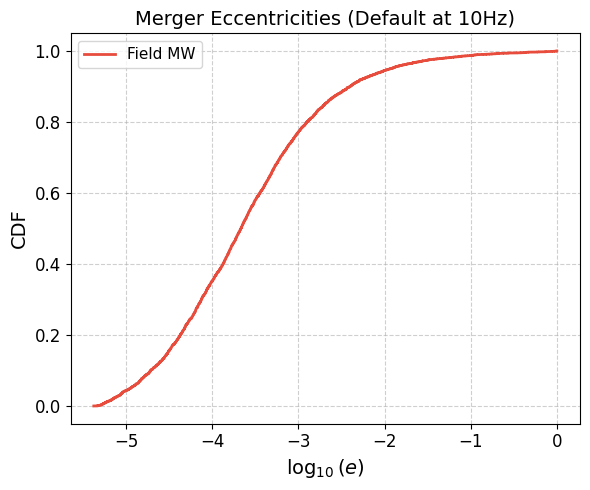


[3.4] Snapshot: Single MW Realization

[Field] Generating Snapshot (MW, Mode=single)...
Systems found: 81


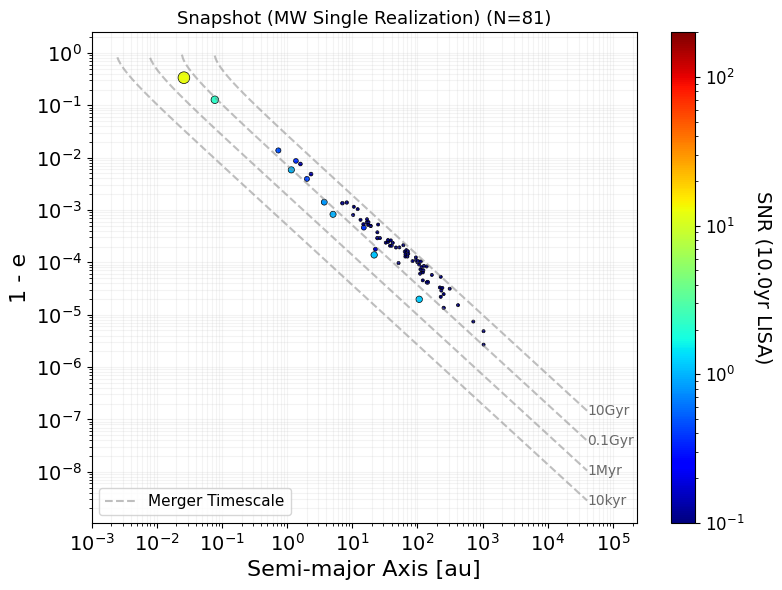


[3.5] running Simulation (Giant Elliptical / M87)

[Field] Running Simulation for Elliptical...
Initializing Elliptical Galaxy Simulation (Log Bins)...
Running MC simulation (Elliptical Galaxy @ 16.8 Mpc)...
   -> Grid: 60 radial bins (Log-spaced)
   -> Samples per bin: 833
   -> TOTAL ITERATIONS: 49980
Resampling population (Total Rate: 6.58487/Myr)...
Raw Candidates found: 42903
Simulation Done. Sample Size: 20000
Data saved to /usr/local/lib/python3.12/dist-packages/LISAeccentric/Field_modeling/data
Simulation Data Saved.

[3.6] Snapshot: Elliptical Galaxy

[Field] Generating Snapshot (Elliptical, Mode=single)...
Systems found: 1577


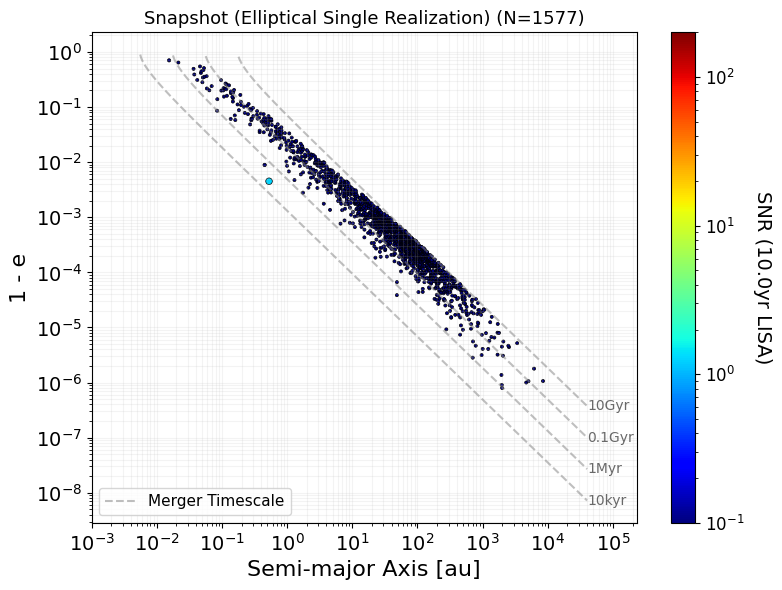

In [ ]:
# ==============================================================================
# MODULE 3: GALACTIC FIELD (FLY-BY INDUCED MERGERS)
# ==============================================================================
print("\n" + "="*70)
print(">>> MODULE 3: GALACTIC FIELD (FLY-BY)")
print("="*70)

# --- 3.1 Run Simulation: Milky Way (MW) ---
# Goal: Run a Monte Carlo simulation of fly-by interactions in the Galactic Field.
# WARNING: This step performs heavy calculation and overwrites files in './data/'.
print("\n[3.1] Running Simulation (Milky Way Model)")
LISAeccentric.Field.run_simulation(
    galaxy_type='MW',
    # --- Physical Parameters ---
    m1=10.0, m2=10.0,     # Mass of BHs [M_sun]
    mp=0.6,               # Mass of perturber (e.g., field star) [M_sun]
    fbh=7.5e-4,           # Fraction of stars hosting wide BBHs
    fgw=10.0,             # GW frequency threshold for merger definition [Hz]
    formation_mod='starburst', # 'starburst' or 'continuous'
    # --- Galaxy Structure (MW) ---
    n0=0.1,               # Stellar density normalization [pc^-3]
    rsun=8000.0,          # Distance to Galactic Center [pc]
    Rl=2600.0,            # Scale length [pc]
    h=1000.0,             # Scale height [pc]
    sigmav=50000.0,       # Velocity dispersion [m/s]
    # --- Simulation Control ---
    n_sim_samples=100000, # Initial MC samples (Reduced for tutorial speed)
    target_N=50000,       # Target output size
    rrange_mw=[0.5, 15]   # Radial range [kpc]
)

# --- 3.2 Inspect Progenitors ---
# Goal: Check the initial SMA distribution and Lifetime of generated progenitors.
print("\n[3.2] Inspecting Field Progenitors")
field_progs = LISAeccentric.Field.get_progenitor(
    galaxy_type='MW',
    plot=True
)

# --- 3.3 Sample Eccentricities (LIGO Band) ---
print("\n[3.3] Sampling Eccentricities (MW Field)")
field_e_samples = LISAeccentric.Field.sample_eccentricities(
    n=5000,
    galaxy_type='MW',
    plot=True
)

# --- 3.4 Snapshots (MW Field) ---
# Goal: Generate a realization of the CURRENTLY observable population (LISA band).
print("\n[3.4] Snapshot: Single MW Realization")
field_snapshot_mw = LISAeccentric.Field.get_snapshot(
    mode='single',        # Options: 'single', 'multi', 'forced'
    t_obs=10.0,           # Observation duration [yr] (affects SNR)
    t_window_Gyr=10.0,    # Future merger window [Gyr]
    galaxy_type='MW',
    plot=True
)

# --- 3.5 Extension: Elliptical Galaxy (M87) ---
# Goal: Simulate fly-bys in a Giant Elliptical Galaxy (like M87).
print("\n[3.5] running Simulation (Giant Elliptical / M87)")
LISAeccentric.Field.run_simulation(
    galaxy_type='Elliptical',
    # --- Galaxy Structure (M87) ---
    distance_Mpc=16.8,    # Distance to galaxy [Mpc]
    M_gal=1.0e12,         # Total stellar mass [M_sun]
    Re=8000.0,            # Effective Radius [pc]
    # --- Physics ---
    m1=30.0, m2=30.0,     # Heavier BHs are common in ellipticals
    mp=0.6,
    ell_n_sim=50000,      # Reduced for tutorial speed
    ell_target_N=20000
)

print("\n[3.6] Snapshot: Elliptical Galaxy")
ell_snapshot = LISAeccentric.Field.get_snapshot(
    mode='single',
    galaxy_type='Elliptical',
    plot=True
)


>>> MODULE 4: WAVEFORM & ANALYSIS
Selected Target System: <CompactBinary [GN_Steadystate]: M=29.2+20.7, a=0.16AU, e=0.9645, Dl=8.0kpc, SNR=76.50>

[4.1] Computing Waveform

[Waveform] Generating Waveform (m=29.1572+20.676299999999998, e=0.964)...
================Ecc Inspiral GW waveform================
PN_EOM = 3; PN_Reaction = 2
m1, m2 = 29.1572,20.676299999999998 [m_sun] ; e0 = 0.9644942000000001
f_orb = 3.616950407937554e-06 [Hz]; f_angular = 3.6174397087996325e-06 [Hz]; f_GR = 9.786017241564644e-10 [Hz]
Evolution: 1.0 yr. f_initial: 3.6174397087996325e-06 [Hz], f_final: 3.617449563579099e-06 [Hz]
Waveform sampling: 0.027066400304414005 Hz, Total points: 853567


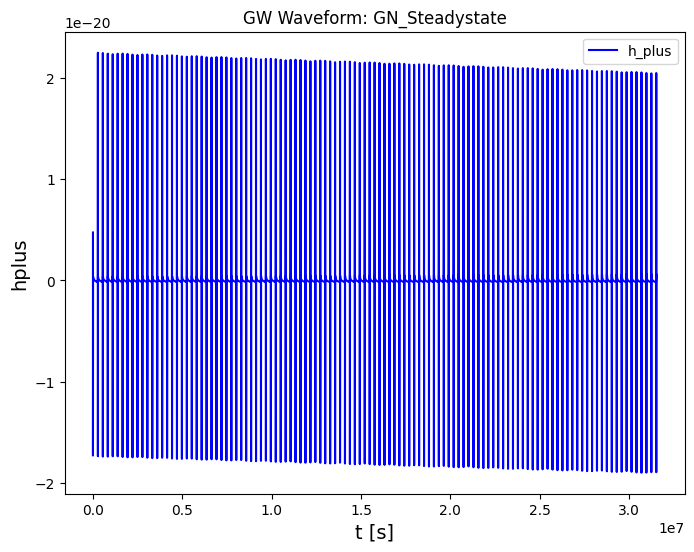


[4.2] Computing LISA Detector Response
[Waveform] Computing LISA Response (Mode: interp)...


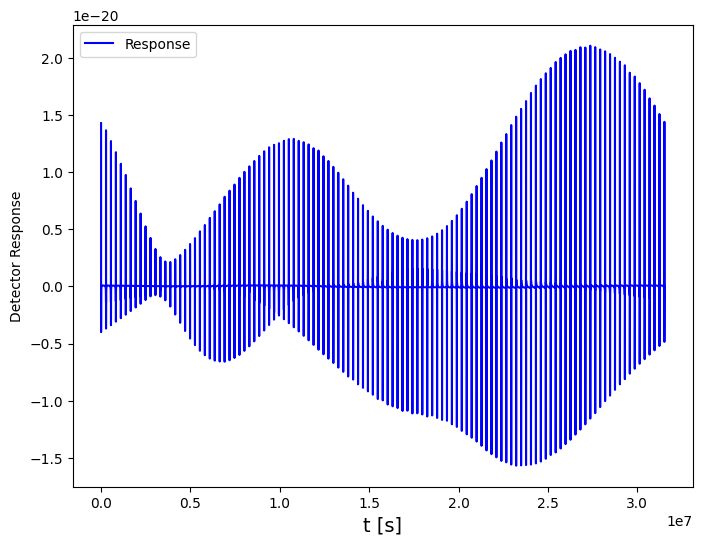


[4.3] SNR Calculation
[Analysis] SNR_analytical = 70.8856
[Analysis] Inner Product = 3.9895e+03
[Analysis] SNR_numerical = 63.1628
   >>> Comparison: Analytical SNR=70.89 vs Numerical SNR=63.16
   >>> Computing Inner Product <h+|h+>...
[Analysis] Inner Product = 3.9895e+03

[4.4] Orbital Evolution
[Analysis] T_merger = 7.5399e+05 yrs
[Analysis] After 376994.8940199638 yrs: a = 6.5952e-02 au, e = 0.917250

[4.5] Characteristic Strain (Single System)
[Analysis] Computing h_c for GN_Steadystate (Tobs=4.0 yr)...


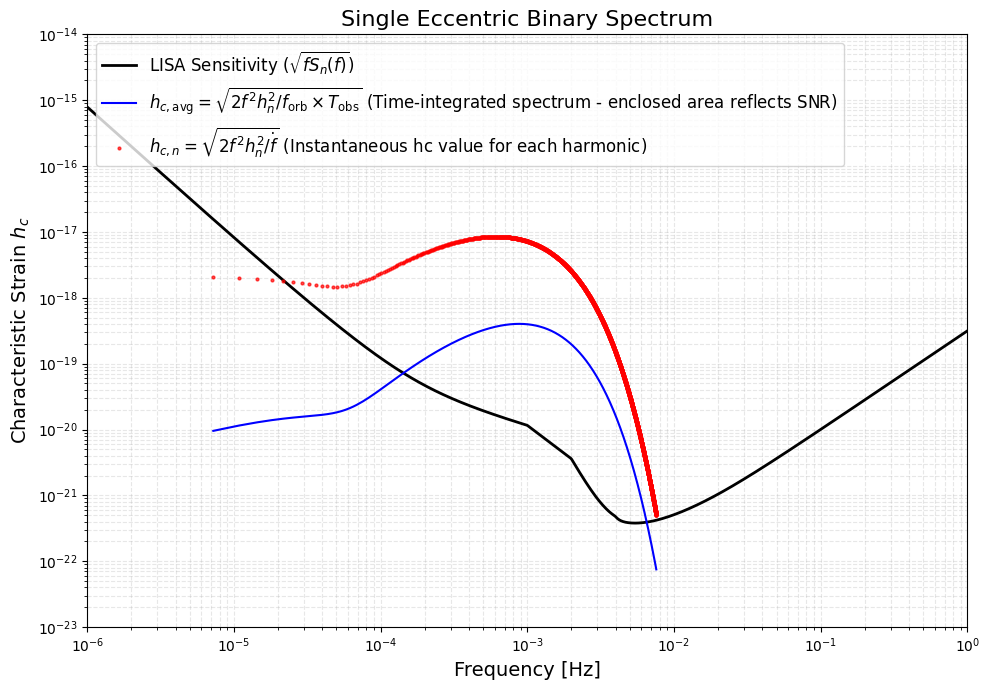


[4.6] Characteristic Strain (Population Batch)

[Analysis] Computing h_c for Batch (N=100)...
Start calculation for 100 systems (Sequential mode)...
Calculation done in 13.56 seconds.


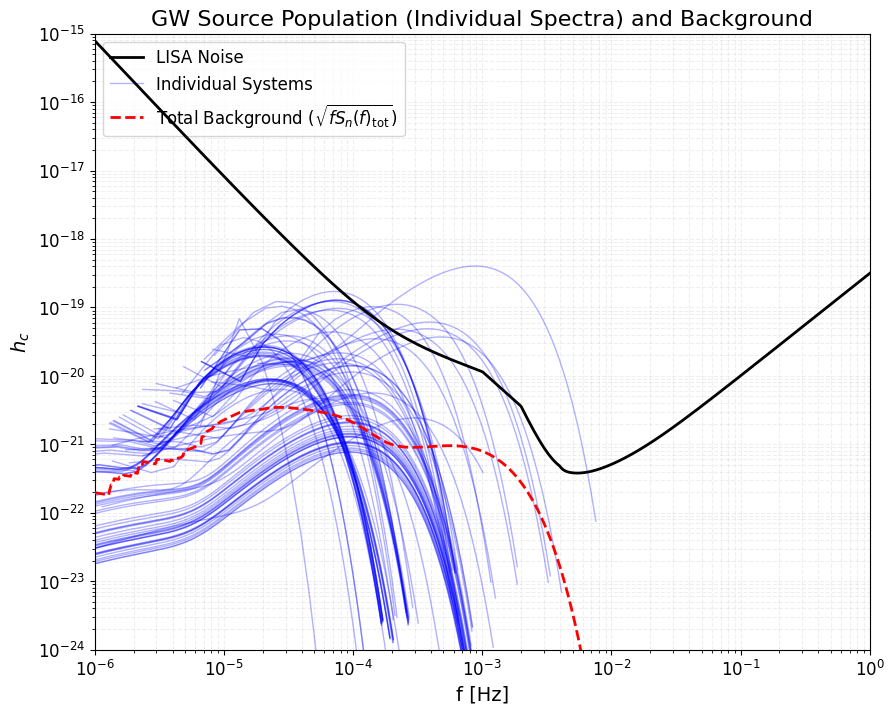


TUTORIAL COMPLETED SUCCESSFULLY


In [ ]:
# ==============================================================================
# MODULE 4: WAVEFORM & ANALYSIS PIPELINE
# ==============================================================================
print("\n" + "="*70)
print(">>> MODULE 4: WAVEFORM & ANALYSIS")
print("="*70)

# Select a target system for detailed analysis (e.g., from the GN snapshot)
if len(gn_snapshot) > 0:
    target_sys = gn_snapshot[0]
    print(f"Selected Target System: {target_sys}")
else:
    # Create a manual system if snapshot is empty
    print("Snapshot empty. Creating manual test system.")
    target_sys = LISAeccentric.CompactBinary(
        m1=30.0, m2=30.0, a=0.5, e=0.9, Dl=8.0, label="Manual_Test"
    )

# --- 4.1 Generate Waveform ---
# Goal: Compute the h_plus and h_cross polarizations in the Source Frame.
# Note: Input can be individual parameters OR the CompactBinary object.
print("\n[4.1] Computing Waveform")
waveform = LISAeccentric.Waveform.compute_waveform_system(
    system=target_sys,
    tobs=1.0,           # Observation time [years]
    theta=np.pi/4,      # Inclination/Position angles
    phi=np.pi/4,
    PN_orbit=3,         # Post-Newtonian order for orbit
    PN_reaction=2,      # Post-Newtonian order for radiation reaction
    plot=True
)
# Unpack results: [time_array, h_plus, h_cross]
t_vec, h_plus, h_cross = waveform[0], waveform[1], waveform[2]

# --- 4.2 LISA Response ---
# Goal: Compute the detector response (Strain) considering LISA's arm motion.
print("\n[4.2] Computing LISA Detector Response")
LISAeccentric.Waveform.compute_LISA_response(
    timelist=t_vec,
    hplus=h_plus,
    hcross=h_cross,
    theta_sky=1.0, phi_sky=2.0, psi_sky=0.5, # Source Sky Position & Polarization
    mode='interp',      # 'interp' (uniform t) or 'raw' (doppler shifted t)
    plot=True
)

# --- 4.3 SNR Calculation ---
# Method A: Analytical (Sky-averaged approximation)
print("\n[4.3] SNR Calculation")
snr_ana = LISAeccentric.Waveform.compute_snr_analytical(system=target_sys, tobs=4.0)

# Method B: Numerical (Inner product of waveform with itself)
snr_num = LISAeccentric.Waveform.compute_snr_numerical(
    timelist=t_vec,
    hplus=h_plus,
    phase_difference=0
)
print(f"   >>> Comparison: Analytical SNR={snr_ana:.2f} vs Numerical SNR={snr_num:.2f}")

# Method C: Direct Inner Product (Between two arbitrary waveforms)
print("   >>> Computing Inner Product <h+|h+>...")
LISAeccentric.Waveform.compute_inner_product(t_vec, h_plus, h_plus)

# --- 4.4 Orbital Evolution ---
# Goal: Calculate time to merger and predict future orbital parameters.
print("\n[4.4] Orbital Evolution")
# 1. Merger Time
t_merge = LISAeccentric.Waveform.compute_merger_time(system=target_sys)

# 2. Evolve System (e.g., look at the system halfway to merger)
if t_merge != float('inf'):
    LISAeccentric.Waveform.evolve_orbit(
        system=target_sys,
        delta_t_years=t_merge / 2.0
    )

# --- 4.5 Characteristic Strain (h_c) ---
# Goal: Compute and plot the Characteristic Strain vs Frequency (for sensitivity curves).

# Case A: Single System
print("\n[4.5] Characteristic Strain (Single System)")
LISAeccentric.Waveform.compute_characteristic_strain_single(
    system=target_sys,
    tobs_years=4.0,
    plot=True
)

# Case B: Population Batch
# Goal: Compute h_c for an entire list of binaries (e.g., from a GN snapshot).
print("\n[4.6] Characteristic Strain (Population Batch)")
if len(gn_snapshot) > 0:
    # Use top 100 systems for demonstration speed
    batch_list = gn_snapshot[:100]
    LISAeccentric.Waveform.run_population_strain_analysis(
        binary_list=batch_list,
        tobs_years=4.0,
        plot=True
    )

print("\n" + "="*70)
print("TUTORIAL COMPLETED SUCCESSFULLY")
print("="*70)